In [5]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from kernels import *

In [6]:
scale = 10
N = 100

In [7]:
n_source_plus = 250*scale
n_source_minus = 250*scale
n_source = n_source_plus + n_source_minus
pi_source = n_source_plus/n_source

n_target_plus = 400*scale
n_target_minus = 100*scale
n_target = n_target_plus + n_target_minus
pi_target = n_target_plus/n_target

In [4]:
res1 = np.zeros(N)
res2 = np.zeros(N)

for i in tqdm(range(N)):

    p_source_plus = np.random.normal(loc=np.array([0,0]), size=(n_source_plus, 2))
    p_source_minus = np.random.normal(loc=np.array([2,2]), size=(n_source_minus, 2))

    p_target_plus = np.random.normal(loc=np.array([0,0]), size=(n_target_plus, 2))
    p_target_minus = np.random.normal(loc=np.array([2,2]), size=(n_target_minus, 2))

    p_target = np.vstack((p_target_plus, p_target_minus))

    res1[i] = pi_ratio_u(p_target, p_source_plus, p_source_minus)
    res2[i] = pi_ratio_v(p_target, p_source_plus, p_source_minus)

 70%|███████   | 70/100 [04:02<01:43,  3.46s/it]


KeyboardInterrupt: 

In [ ]:
plt.hist(res1)
plt.hist(res2)
plt.show()

NameError: name 'res1' is not defined

In [ ]:
# n_source_plus = 250
# n_source_minus = 250
# n_source = n_source_plus + n_source_minus
# pi_source = n_source_plus/n_source

# n_target_plus = 400
# n_target_minus = 100
# n_target = n_target_plus + n_target_minus
# pi_target = n_target_plus/n_target

In [ ]:
# res1 = np.zeros(N)
# res2 = np.zeros(N)

# for i in range(N):

#     p_source_plus = np.random.normal(loc=np.array([0,0]), size=(n_source_plus, 2))
#     p_source_minus = np.random.normal(loc=np.array([2,2]), size=(n_source_minus, 2))

#     p_target_plus = np.random.normal(loc=np.array([0,0]), size=(n_target_plus, 2))
#     p_target_minus = np.random.normal(loc=np.array([2,2]), size=(n_target_minus, 2))

#     p_target = np.vstack((p_target_plus, p_target_minus))

#     res1[i] = pi_ratio_u(p_target, p_source_plus, p_source_minus)
#     res2[i] = pi_ratio_v(p_target, p_source_plus, p_source_minus)

In [ ]:
# plt.hist(res1)
# plt.hist(res2)
# plt.show()

In [8]:
lambda_target = (1/n_target)/((1/n_target) + (1/n_source_plus) + (1/n_source_minus))
lambda_plus = (1/n_source_plus)/((1/n_target) + (1/n_source_plus) + (1/n_source_minus))
lambda_minus = (1/n_source_minus)/((1/n_target) + (1/n_source_plus) + (1/n_source_minus))

In [9]:
lambda_target, lambda_plus, lambda_minus, ((1/n_target) + (1/n_source_plus) + (1/n_source_minus))

(0.2, 0.4, 0.4, 0.001)

In [10]:
scale = 1
n_source_plus = 250*scale
n_source_minus = 250*scale
n_source = n_source_plus + n_source_minus
pi_source = n_source_plus/n_source

n_target_plus = 400*scale
n_target_minus = 100*scale
n_target = n_target_plus + n_target_minus
pi_target = n_target_plus/n_target

p_source_plus = np.random.normal(loc=np.array([0,0]), size=(n_source_plus, 2))
p_source_minus = np.random.normal(loc=np.array([2,2]), size=(n_source_minus, 2))

p_target_plus = np.random.normal(loc=np.array([0,0]), size=(n_target_plus, 2))
p_target_minus = np.random.normal(loc=np.array([2,2]), size=(n_target_minus, 2))

p_target = np.vstack((p_target_plus, p_target_minus))


In [11]:
est_var = lambda_target*sigma_prime(p_target, p_source_plus, p_source_minus) \
      + lambda_plus*sigma_plus(p_target, p_source_plus, p_source_minus, n_target_plus/n_target) \
        + lambda_minus*sigma_minus(p_target, p_source_plus, p_source_minus, n_target_plus/n_target)

In [12]:
est_var = est_var/((n_target_plus/n_target)**2*delta_P_Q_V(p_source_plus, p_source_minus)**2)

In [13]:
# np.var(res1)

In [14]:
np.sqrt(est_var)

np.float64(0.651832832818086)

In [15]:
est_var

np.float64(0.42488604193965085)

In [ ]:
x_seq = np.linspace(-2, 2, 100)

In [ ]:
from scipy.stats import norm

In [ ]:
y_seq = norm.pdf(x_seq, loc=0,  scale=np.sqrt((est_var)))

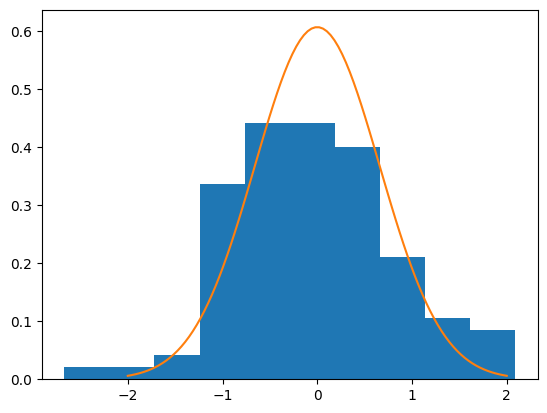

In [ ]:
denominator = (((1/n_target) + (1/n_source_plus) + (1/n_source_minus)))

plt.hist((res1 - (n_target_plus/n_target))/denominator, density=True)
plt.plot(x_seq, y_seq)
plt.show()